In [4]:
import statsmodels.api as sm

In [1]:
import pandas as pd 
from sklearn import linear_model    
from sklearn.model_selection import train_test_split

data = pd.read_csv('./경기도변수_0810.csv')
data.head()

,name,target,gagu,car,ic,people,food,industry
0,가평군,0,8996,6,1,31228,15,1
1,고양시,0,100409,11,2,670610,8,0
2,과천시,0,3744,1,0,38138,0,0
3,광명시,0,26496,2,0,180740,0,1
4,광주시,1,34577,10,0,233421,16,0


In [2]:
data = data.drop(["name"],axis = 1, inplace = False)
data = data.drop(["gagu"],axis = 1, inplace = False)
data

,target,car,ic,people,food,industry
0,0,6,1,31228,15,1
1,0,11,2,670610,8,0
2,0,1,0,38138,0,0
3,0,2,0,180740,0,1
4,1,10,0,233421,16,0
5,0,4,5,122270,0,0
6,3,2,6,169212,0,1
7,7,21,1,283747,17,13
8,0,17,5,421688,21,3
9,0,4,0,52333,0,4


In [5]:
#bias를 위한 상수항 추가 
data = sm.add_constant(data, has_constant = "add")
data

,const,target,car,ic,people,food,industry
0,1.0,0,6,1,31228,15,1
1,1.0,0,11,2,670610,8,0
2,1.0,0,1,0,38138,0,0
3,1.0,0,2,0,180740,0,1
4,1.0,1,10,0,233421,16,0
5,1.0,0,4,5,122270,0,0
6,1.0,3,2,6,169212,0,1
7,1.0,7,21,1,283747,17,13
8,1.0,0,17,5,421688,21,3
9,1.0,0,4,0,52333,0,4


In [146]:
#설명변수(X)와 타겟변수(y)를 분리/ 학습데이터와 평가데이터를 분할 
feature_columns = data.columns.difference(["target"]) # Target column 빼기

X = data[feature_columns]
y = data.target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(21, 6) (10, 6) (21,) (10,)


# OLS
OLS(Ordinary Least Square)은 가장 기본적인 결정론적 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

OLS를 알기위해서 우선 최소제곱법(Least Square Method)를 알아야 한다. 
간단하게 말해서 가장적합한 회귀계수 추정치를 찾음으로써 가장 적합한 회귀직선을 추정하는 것이다.

In [152]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
def processSubset(x,y,feature_set):
    model = sm.OLS(y,x[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(x = train_x, y = train_y, feature_set = feature_columns[:]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019CAD4ED430>, 'AIC': 60.634183893470876}


In [160]:
### 전진석택법(step=1)

def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel

In [161]:
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])

In [166]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel

In [167]:
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])

In [171]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

In [172]:
stepwiseBestModel = Stepwise_model(train_x,train_y)

Processed  5 models on 1 predictors in 0.02380204200744629
Selected predictors: ['industry', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019CAE54EFD0>
forward
Processed 1 models on 0 predictors in 0.008085012435913086
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019CAD402FA0>
Processed  4 models on 2 predictors in 0.01691269874572754
Selected predictors: ['industry', 'car', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019CAD4025B0>
forward
Processed 2 models on 1 predictors in 0.008088827133178711
Selected predictors : ['industry', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019CAD402C40>
Processed  3 models on 3 predictors in 0.012187957763671875
Selected predictors: ['industry', 'car', 'people', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrap

In [173]:
stepwiseBestModel.aic

58.697231978958456

In [174]:
stepwiseBestModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     34.99
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.00e-07
Time:                        17:22:11   Log-Likelihood:                -24.349
No. Observations:                  21   AIC:                             58.70
Df Residuals:                      16   BIC:                             63.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
industry       0.3242      0.030     10.673      0.000       0.260       0.389
car           -0.1915      0.048     -4.002      0.001      -0.293      -0.090
people      3.136e-06    1.1e-06      2.840      0.012    7.96e-07    5.48e-06
food           0.0727      0.028      2.620      0.019       0.014       0.132
const         -0.4934      0.386     -1.280      0.219      -1.311       0.324
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.291
Skew:                          -0.280   Prob(JB):                        0.865
Kurtosis:                       3.134   Cond. No.                     6.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

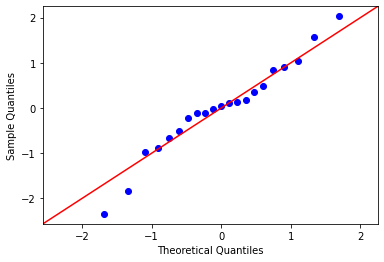

In [149]:
# 학습데이터의 잔차 확인

res = stepwiseBestModel.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

# VIF
VIF란, Variance Inflation Factor의 약자로서, 분산 팽창 인수라고 합니다.

이 값은 다중회귀분석에서 독립변수가 다중 공산성(Multicollnearity)의 문제를 갖고 있는지 판단하는 기준이며,

주로 10보다 크면 그 독립변수는 다중공산성이 있다고 말합니다.

- 즉, VIF(i)> 10은  i 번째 독립변수 없이도 충분히 반응변수(y)를 잘 설명할 수 있으므로, i 번째 독립변수는 없어도 된다는 것을 의미합니다.

In [6]:
#VIF를 통한 다중겅선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

final_data = data.loc[:,['const','car','people','food','industry']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
vif["features"] = final_data.columns
vif

,VIF Factor,features
0,3.840167,const
1,3.061419,car
2,1.263730,people
3,2.672451,food
4,1.802237,industry


In [ ]:
final_data = data.loc[:,['const','car','people','food','industry']]

- gagu와 people은 다중공산성이 있다.